<a href="https://colab.research.google.com/github/tmengab/lectureCode-sp23/blob/main/HSIanalyst.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving HSI.xlsx to HSI (43).xlsx


<ipython-input-50-c40068fb0ffa>:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.asfreq('D').fillna(method='ffill')


Index(['Open', 'High', 'Low', 'Close', 'Up votes', 'Down votes', 'Spread',
       'Close_t-1', 'return', 'EMA_Short', 'EMA_Long', 'MACD', 'Signal_Line',
       'MACD_Histogram', 'RSI', 'ATR', 'Lag1_Return', 'Lag2_Return'],
      dtype='object')


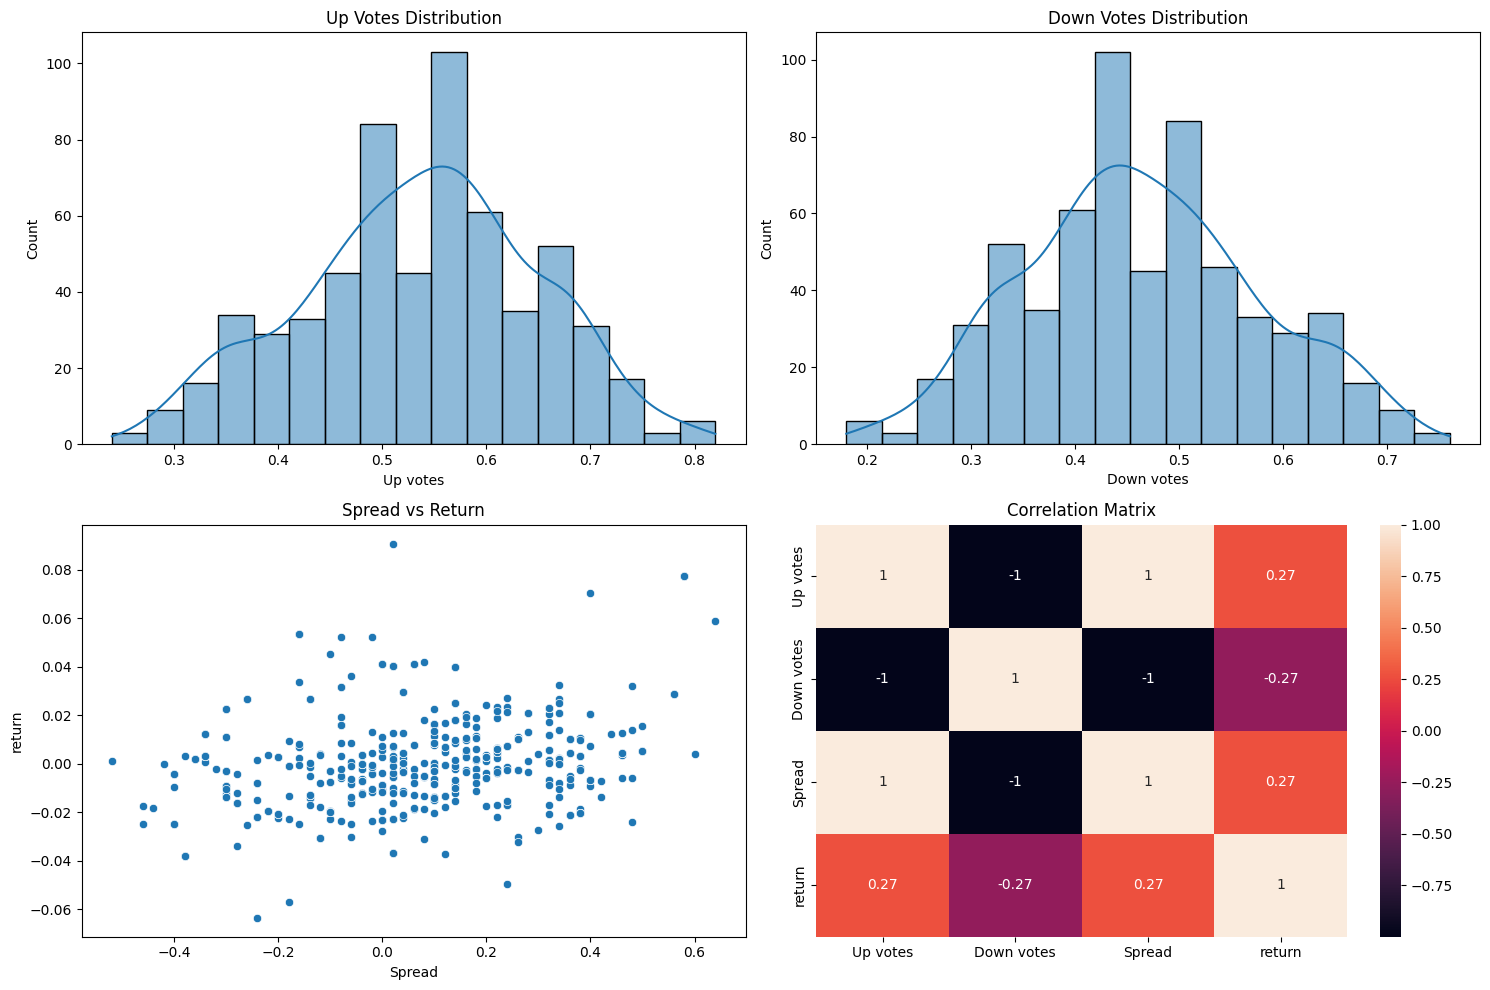

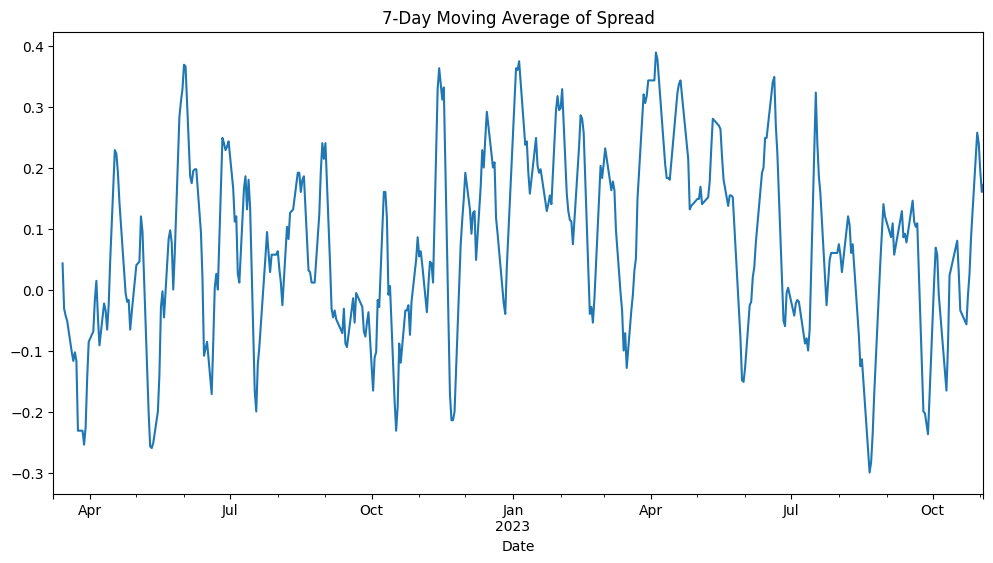

<ipython-input-50-c40068fb0ffa>:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Vote_Strategy_Return'] = test['Vote_Signal'] * test['return']
<ipython-input-50-c40068fb0ffa>:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Vote_Cumulative_Return'] = (1 + test['Vote_Strategy_Return']).cumprod()
<ipython-input-50-c40068fb0ffa>:121: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

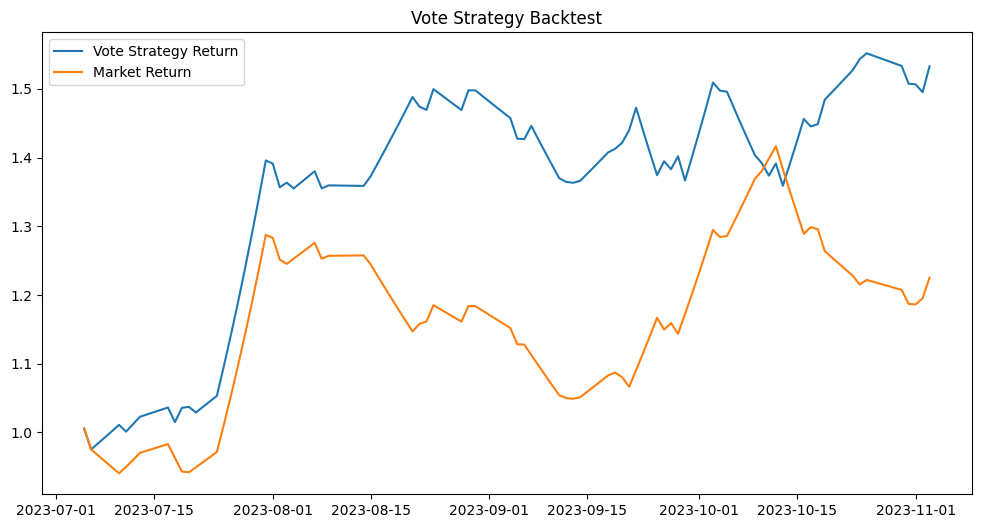

<ipython-input-50-c40068fb0ffa>:134: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_market_return = returns[-1] - 1
<ipython-input-50-c40068fb0ffa>:135: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_strategy_return = strategy_returns[-1] - 1
<ipython-input-50-c40068fb0ffa>:187: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['MACD_Strategy_Return'] = test['MACD_Si


Vote Strategy Analysis:
Total Market Return: 22.53%
Total Strategy Return: 53.28%
Annualized Market Return: 52.15%
Annualized Strategy Return: 141.63%
Market Volatility: 25.41%
Strategy Volatility: 24.91%
Market Sharpe Ratio: 2.05
Strategy Sharpe Ratio: 5.69
Max Drawdown (Market): -18.53%
Max Drawdown (Strategy): -9.95%


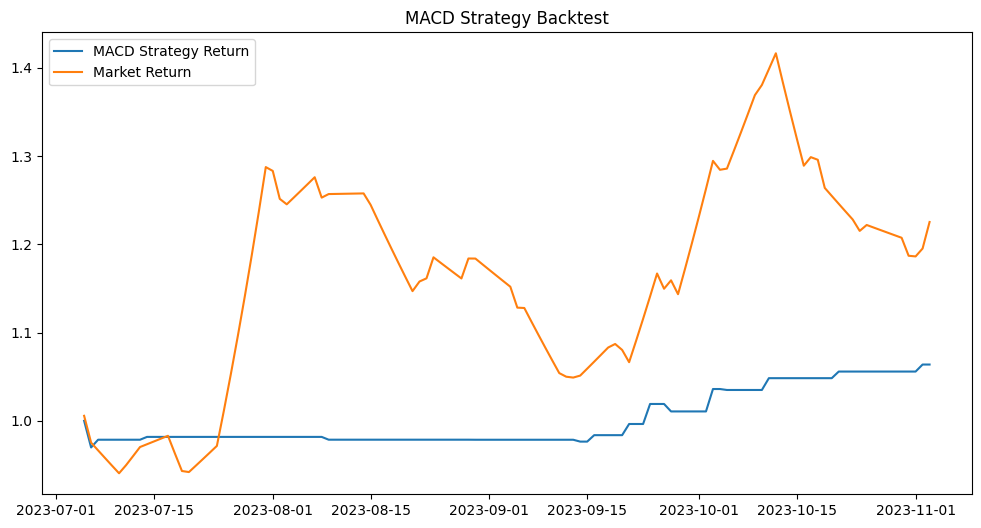

<ipython-input-50-c40068fb0ffa>:202: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_market_return = returns[-1] - 1
<ipython-input-50-c40068fb0ffa>:203: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_strategy_return = strategy_returns[-1] - 1



MACD Strategy Analysis:
Total Market Return: 22.53%
Total Strategy Return: 6.37%
Annualized Market Return: 52.15%
Annualized Strategy Return: 13.62%
Market Volatility: 25.41%
Strategy Volatility: 7.54%
Market Sharpe Ratio: 2.05
Strategy Sharpe Ratio: 1.81
Max Drawdown (Market): -18.53%
Max Drawdown (Strategy): -3.02%
RMSE: 0.013904705526987008


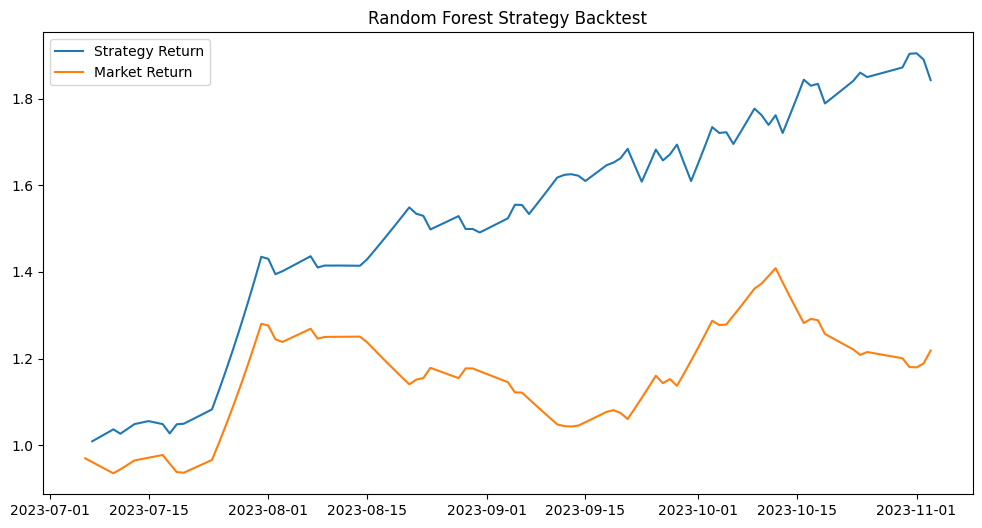


Random Forest Strategy Analysis:
Total Market Return: 21.84%
Total Strategy Return: 84.26%
Annualized Market Return: 50.89%
Annualized Strategy Return: 257.09%
Market Volatility: 25.09%
Strategy Volatility: 23.98%
Market Sharpe Ratio: 2.03
Strategy Sharpe Ratio: 10.72
Max Drawdown (Market): -18.53%
Max Drawdown (Strategy): -4.96%


<ipython-input-50-c40068fb0ffa>:288: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_market_return = returns[-1] - 1
<ipython-input-50-c40068fb0ffa>:289: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_strategy_return = strategy_returns[-1] - 1


In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from google.colab import files
from statsmodels.tsa.arima.model import ARIMA




# ==================== 数据加载与预处理 ====================
uploaded = files.upload()
data = pd.read_excel('HSI.xlsx')

# 动态计算 Close_t-1 和 return
data['Close_t-1'] = data['Close'].shift(1)  # 前一天的收盘价
data['return'] = data['Close'] / data['Close_t-1'] - 1  # 当天的收益率

data.dropna(inplace=True)
# 转换日期列为 datetime 类型并设置为索引
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# 确保日期索引是单调递增的，并添加频率信息
if not data.index.is_monotonic_increasing:
    data = data.sort_index()
data = data.asfreq('D').fillna(method='ffill')



def calculate_macd(data, short_window=12, long_window=26, signal_window=9):
    data['EMA_Short'] = data['Close'].ewm(span=short_window, adjust=False).mean()
    data['EMA_Long'] = data['Close'].ewm(span=long_window, adjust=False).mean()
    data['MACD'] = data['EMA_Short'] - data['EMA_Long']
    data['Signal_Line'] = data['MACD'].ewm(span=signal_window, adjust=False).mean()
    data['MACD_Histogram'] = data['MACD'] - data['Signal_Line']
    return data

def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    data['RSI'] = 100 - (100 / (1 + rs))
    return data

def calculate_atr(data, window=14):
    high_low = data['High'] - data['Low']
    high_close = np.abs(data['High'] - data['Close'].shift())
    low_close = np.abs(data['Low'] - data['Close'].shift())
    ranges = pd.concat([high_low, high_close, low_close], axis=1)
    true_range = ranges.max(axis=1)
    data['ATR'] = true_range.rolling(window=window).mean()
    return data

# 应用技术指标计算
data = calculate_macd(data)
data = calculate_rsi(data)
data = calculate_atr(data)

# 创建滞后收益率
data['Lag1_Return'] = data['return'].shift(1)
data['Lag2_Return'] = data['return'].shift(2)

# 删除缺失值
data.dropna(inplace=True)



# ==================== 数据探索 ====================
# 分布分析
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.histplot(data['Up votes'], kde=True)
plt.title('Up Votes Distribution')
plt.subplot(2, 2, 2)
sns.histplot(data['Down votes'], kde=True)
plt.title('Down Votes Distribution')
print(data.columns)
plt.subplot(2, 2, 3)
sns.scatterplot(x='Spread', y='return', data=data)
plt.title('Spread vs Return')
plt.subplot(2, 2, 4)
corr_matrix = data[['Up votes', 'Down votes', 'Spread', 'return']].corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

# 时间序列模式分析
plt.figure(figsize=(12, 6))
data['Spread'].rolling(window=7).mean().plot()
plt.title('7-Day Moving Average of Spread')
plt.show()



# ==================== 简单投票策略信号生成 ====================
data['Vote_Buy_Signal'] = data['Up votes'] > 0.5
data['Vote_Sell_Signal'] = data['Down votes'] > 0.49

# 将信号转换为交易信号（1 表示买入，-1 表示卖出，0 表示持有）
data['Vote_Signal'] = 0
data.loc[data['Vote_Buy_Signal'], 'Vote_Signal'] = 1
data.loc[data['Vote_Sell_Signal'], 'Vote_Signal'] = -1

# 避免未来数据泄露
data['Vote_Signal'] = data['Vote_Signal'].shift(1)

# 准备训练集和测试集
train_size = int(len(data) * 0.8)
train, test = data.iloc[:train_size], data.iloc[train_size:]

# 回测投票策略
test['Vote_Strategy_Return'] = test['Vote_Signal'] * test['return']
test['Vote_Cumulative_Return'] = (1 + test['Vote_Strategy_Return']).cumprod()
test['Market_Cumulative_Return'] = (1 + test['return']).cumprod()

# 可视化结果
plt.figure(figsize=(12, 6))
plt.plot(test['Vote_Cumulative_Return'], label='Vote Strategy Return')
plt.plot(test['Market_Cumulative_Return'], label='Market Return')
plt.title('Vote Strategy Backtest')
plt.legend()
plt.show()

# ==================== 回测分析函数 ====================
def backtest_analysis_vote(returns, strategy_returns, name):
    # 总收益
    total_market_return = returns[-1] - 1
    total_strategy_return = strategy_returns[-1] - 1
    # 年化收益
    annualized_market_return = (1 + total_market_return) ** (252 / len(returns)) - 1
    annualized_strategy_return = (1 + total_strategy_return) ** (252 / len(strategy_returns)) - 1
    # 波动率
    market_volatility = returns.pct_change().std() * np.sqrt(252)
    strategy_volatility = strategy_returns.pct_change().std() * np.sqrt(252)
    # 夏普比率
    sharpe_ratio_market = annualized_market_return / market_volatility
    sharpe_ratio_strategy = annualized_strategy_return / strategy_volatility
    # 最大回撤
    market_rolling_max = returns.cummax()
    strategy_rolling_max = strategy_returns.cummax()
    market_drawdown = (returns - market_rolling_max) / market_rolling_max
    strategy_drawdown = (strategy_returns - strategy_rolling_max) / strategy_rolling_max
    max_drawdown_market = market_drawdown.min()
    max_drawdown_strategy = strategy_drawdown.min()
    # 输出回测结果
    print(f"\n{name} Strategy Analysis:")
    print(f"Total Market Return: {total_market_return:.2%}")
    print(f"Total Strategy Return: {total_strategy_return:.2%}")
    print(f"Annualized Market Return: {annualized_market_return:.2%}")
    print(f"Annualized Strategy Return: {annualized_strategy_return:.2%}")
    print(f"Market Volatility: {market_volatility:.2%}")
    print(f"Strategy Volatility: {strategy_volatility:.2%}")
    print(f"Market Sharpe Ratio: {sharpe_ratio_market:.2f}")
    print(f"Strategy Sharpe Ratio: {sharpe_ratio_strategy:.2f}")
    print(f"Max Drawdown (Market): {max_drawdown_market:.2%}")
    print(f"Max Drawdown (Strategy): {max_drawdown_strategy:.2%}")

# 执行分析
backtest_analysis_vote(test['Market_Cumulative_Return'], test['Vote_Cumulative_Return'], 'Vote')

# ==================== MACD 交易信号生成 ====================
# 买入信号：当 MACD 线上穿 Signal 线时
# 卖出信号：当 MACD 线下穿 Signal 线时
data['MACD_Buy_Signal'] = (data['MACD'] > data['Signal_Line']) & (data['MACD'].shift(1) <= data['Signal_Line'].shift(1))
data['MACD_Sell_Signal'] = (data['MACD'] < data['Signal_Line']) & (data['MACD'].shift(1) >= data['Signal_Line'].shift(1))

# 将信号转换为交易信号（1 表示买入，-1 表示卖出，0 表示持有）
data['MACD_Signal'] = 0
data.loc[data['MACD_Buy_Signal'], 'MACD_Signal'] = 1
data.loc[data['MACD_Sell_Signal'], 'MACD_Signal'] = -1

# 避免未来数据泄露
data['MACD_Signal'] = data['MACD_Signal'].shift(1)

# 准备训练集和测试集
train_size = int(len(data) * 0.8)
train, test = data.iloc[:train_size], data.iloc[train_size:]

# 回测 MACD 策略
test['MACD_Strategy_Return'] = test['MACD_Signal'] * test['return']
test['MACD_Cumulative_Return'] = (1 + test['MACD_Strategy_Return']).cumprod()
test['Market_Cumulative_Return'] = (1 + test['return']).cumprod()

# 可视化结果
plt.figure(figsize=(12, 6))
plt.plot(test['MACD_Cumulative_Return'], label='MACD Strategy Return')
plt.plot(test['Market_Cumulative_Return'], label='Market Return')
plt.title('MACD Strategy Backtest')
plt.legend()
plt.show()

# ==================== 回测分析函数 ====================
def backtest_analysis(returns, strategy_returns, name):
    # 总收益
    total_market_return = returns[-1] - 1
    total_strategy_return = strategy_returns[-1] - 1

    # 年化收益
    annualized_market_return = (1 + total_market_return) ** (252 / len(returns)) - 1
    annualized_strategy_return = (1 + total_strategy_return) ** (252 / len(strategy_returns)) - 1

    # 波动率
    market_volatility = returns.pct_change().std() * np.sqrt(252)
    strategy_volatility = strategy_returns.pct_change().std() * np.sqrt(252)

    # 夏普比率
    sharpe_ratio_market = annualized_market_return / market_volatility
    sharpe_ratio_strategy = annualized_strategy_return / strategy_volatility

    # 最大回撤
    market_rolling_max = returns.cummax()
    strategy_rolling_max = strategy_returns.cummax()
    market_drawdown = (returns - market_rolling_max) / market_rolling_max
    strategy_drawdown = (strategy_returns - strategy_rolling_max) / strategy_rolling_max
    max_drawdown_market = market_drawdown.min()
    max_drawdown_strategy = strategy_drawdown.min()

    # 输出回测结果
    print(f"\n{name} Strategy Analysis:")
    print(f"Total Market Return: {total_market_return:.2%}")
    print(f"Total Strategy Return: {total_strategy_return:.2%}")
    print(f"Annualized Market Return: {annualized_market_return:.2%}")
    print(f"Annualized Strategy Return: {annualized_strategy_return:.2%}")
    print(f"Market Volatility: {market_volatility:.2%}")
    print(f"Strategy Volatility: {strategy_volatility:.2%}")
    print(f"Market Sharpe Ratio: {sharpe_ratio_market:.2f}")
    print(f"Strategy Sharpe Ratio: {sharpe_ratio_strategy:.2f}")
    print(f"Max Drawdown (Market): {max_drawdown_market:.2%}")
    print(f"Max Drawdown (Strategy): {max_drawdown_strategy:.2%}")

# 执行分析
backtest_analysis(test['Market_Cumulative_Return'], test['MACD_Cumulative_Return'], 'MACD')


# ==================== 机器学习策略（随机森林） ====================
ml_data = data.copy()

ml_data['Lag1_Return'] = ml_data['return'].shift(1)
ml_data['Lag2_Return'] = ml_data['return'].shift(2)
ml_data.dropna(inplace=True)

# 准备特征和目标
X = ml_data[['Up votes', 'Down votes', 'Spread', 'Lag1_Return', 'Lag2_Return',
             'RSI', 'ATR', 'MACD_Histogram']]
y = ml_data['return']

# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# 训练模型（调整超参数）
rf = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
rf.fit(X_train, y_train)

# 预测和评估
y_pred = rf.predict(X_test)
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')

# 生成信号
ml_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}, index=X_test.index)
ml_results['RF_Signal'] = np.where(ml_results['Predicted'] > 0, 1, -1)
ml_results['RF_Signal'] = ml_results['RF_Signal'].shift(1)  # 避免未来数据泄露

# 回测
ml_results['RF_Strategy_Return'] = ml_results['RF_Signal'] * ml_results['Actual']
ml_results['RF_Cumulative_Return'] = (1 + ml_results['RF_Strategy_Return']).cumprod()
ml_results['Market_Cumulative_Return'] = (1 + ml_results['Actual']).cumprod()

# 可视化结果
plt.figure(figsize=(12, 6))
plt.plot(ml_results['RF_Cumulative_Return'], label='Strategy Return')
plt.plot(ml_results['Market_Cumulative_Return'], label='Market Return')
plt.title('Random Forest Strategy Backtest')
plt.legend()
plt.show()



# ==================== 回测分析函数 ====================
def backtest_analysis1(returns, strategy_returns, name):
    # 总收益
    total_market_return = returns[-1] - 1
    total_strategy_return = strategy_returns[-1] - 1

    # 年化收益
    annualized_market_return = (1 + total_market_return) ** (252 / len(returns)) - 1
    annualized_strategy_return = (1 + total_strategy_return) ** (252 / len(strategy_returns)) - 1

    # 波动率
    market_volatility = returns.pct_change().std() * np.sqrt(252)
    strategy_volatility = strategy_returns.pct_change().std() * np.sqrt(252)

    # 夏普比率
    sharpe_ratio_market = annualized_market_return / market_volatility
    sharpe_ratio_strategy = annualized_strategy_return / strategy_volatility

    # 最大回撤
    market_rolling_max = returns.cummax()
    strategy_rolling_max = strategy_returns.cummax()
    market_drawdown = (returns - market_rolling_max) / market_rolling_max
    strategy_drawdown = (strategy_returns - strategy_rolling_max) / strategy_rolling_max
    max_drawdown_market = market_drawdown.min()
    max_drawdown_strategy = strategy_drawdown.min()

    # 输出回测结果
    print(f"\n{name} Strategy Analysis:")
    print(f"Total Market Return: {total_market_return:.2%}")
    print(f"Total Strategy Return: {total_strategy_return:.2%}")
    print(f"Annualized Market Return: {annualized_market_return:.2%}")
    print(f"Annualized Strategy Return: {annualized_strategy_return:.2%}")
    print(f"Market Volatility: {market_volatility:.2%}")
    print(f"Strategy Volatility: {strategy_volatility:.2%}")
    print(f"Market Sharpe Ratio: {sharpe_ratio_market:.2f}")
    print(f"Strategy Sharpe Ratio: {sharpe_ratio_strategy:.2f}")
    print(f"Max Drawdown (Market): {max_drawdown_market:.2%}")
    print(f"Max Drawdown (Strategy): {max_drawdown_strategy:.2%}")

# 执行分析

backtest_analysis1(ml_results['Market_Cumulative_Return'], ml_results['RF_Cumulative_Return'], 'Random Forest')